In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("fastfood.csv")
df.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [3]:
#renaming all the columns to appropriate names
df = df.rename({'Calories from\nFat' : 'Calories from Fat','Total Fat\n(g)':'Total Fat','Saturated Fat\n(g)':'Saturated Fat','Trans Fat\n(g)': 'Trans Fat',
          'Cholesterol\n(mg)':'Cholesterol','Sodium \n(mg)':'Sodium','Carbs\n(g)':'Carbs','Fiber\n(g)':'Fiber','Sugars\n(g)':'Sugars','Protein\n(g)':'Protein'},axis=1)

#Converting all the columns from string to integers
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
df['Protein'] = pd.to_numeric(df['Protein'], errors='coerce')
df['Total Fat'] = pd.to_numeric(df['Total Fat'], errors='coerce')
df['Carbs'] = pd.to_numeric(df['Carbs'], errors='coerce')
default_value = 0  
df['Calories'].fillna(default_value, inplace=True)
df['Calories'] = df['Calories'].astype(int)
df['Protein'].fillna(default_value, inplace=True)
df['Protein'] = df['Protein'].astype(int)
df['Total Fat'].fillna(default_value, inplace=True)
df['Total Fat'] = df['Total Fat'].astype(int)
df['Carbs'].fillna(default_value, inplace=True)
df['Carbs'] = df['Calories'].astype(int)
df.shape

(1148, 14)

### removing outliers

In [4]:
Q1 = np.percentile(df['Calories'], 25, method='midpoint')
Q3 = np.percentile(df['Calories'], 75, method='midpoint')
IQR = Q3 - Q1

upper=Q3+1.5*IQR
upper_array=np.where(df['Calories']>=upper)[0]
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.where(df['Calories']<=lower)[0]


df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

df.describe()

,Calories,Total Fat,Carbs,Protein
count,1106.000000,1106.000000,1106.000000,1106.000000
mean,258.557866,9.532550,258.557866,7.896022
std,183.713270,11.125501,183.713270,9.187885
min,0.000000,0.000000,0.000000,0.000000
25%,130.000000,0.000000,130.000000,0.000000
50%,230.000000,6.000000,230.000000,5.000000
75%,370.000000,16.000000,370.000000,13.000000
max,750.000000,52.000000,750.000000,48.000000


In [5]:
count = df['Company'].value_counts()
chains = pd.DataFrame(count)
chains

,Company
McDonald’s,316
KFC,212
Taco Bell,180
Burger King,174
Wendy’s,150
Pizza Hut,74


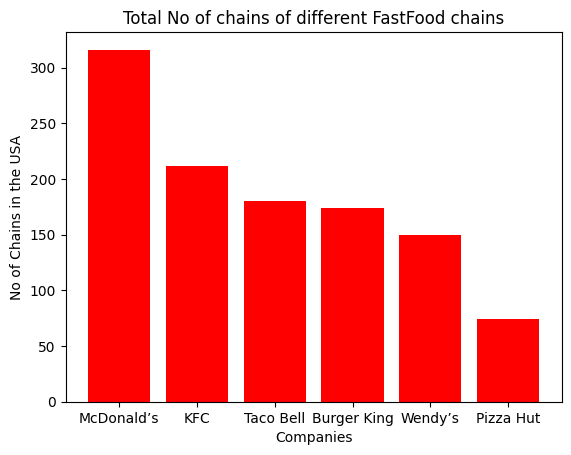

In [6]:
import matplotlib.pyplot as plt

plt.bar(count.keys(), chains['Company'], color ='red')
plt.xlabel("Companies")
plt.ylabel("No of Chains in the USA")
plt.title("Total No of chains of different FastFood chains")
plt.show()

### Percentage of Protein

<BarContainer object of 6 artists>

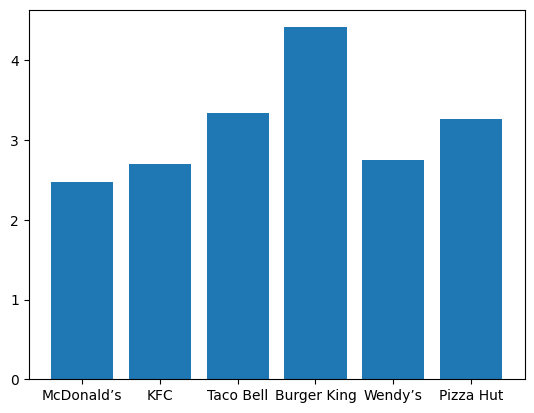

In [7]:
a = df.groupby('Company')['Calories'].sum()
b = df.groupby('Company')['Protein'].sum()
plt.bar(count.keys(), b/a*100)

In [8]:
a = df.groupby('Company')['Calories'].mean()
b = df.groupby('Company')['Carbs'].mean()
b

Company
Burger King    280.890805
KFC            195.518868
McDonald’s     257.072785
Pizza Hut      253.378378
Taco Bell      276.666667
Wendy’s        305.700000
Name: Carbs, dtype: float64

Text(0.5, 1.0, 'Average Calories per Company')

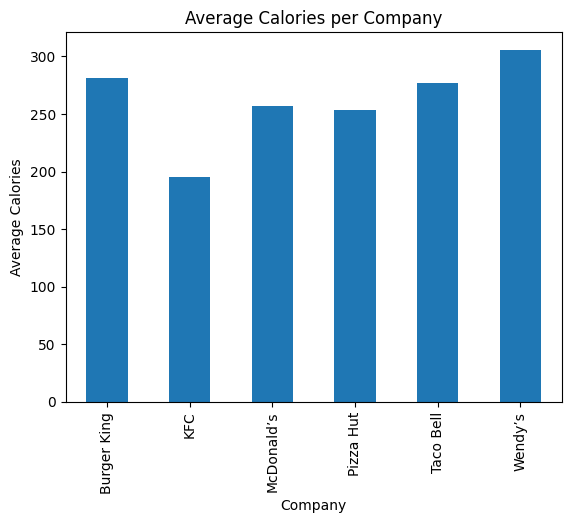

In [9]:
a.plot.bar()
plt.xlabel("Company")
plt.ylabel("Average Calories")
plt.title("Average Calories per Company")

In [10]:
df.head()

,Company,Item,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbs,Fiber,Sugars,Protein,Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,250,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,300,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,440,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,390,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,510,3,9,29,502


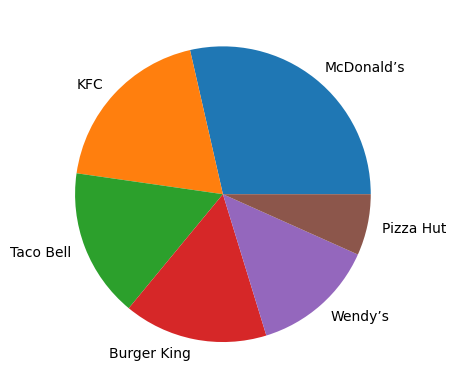

In [11]:
import numpy as np 

y = np.array(chains['Company'])
plt.pie(y, labels = count.keys())
plt.show() 

C:\Users\Nived\AppData\Local\Temp\ipykernel_10548\2458139118.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


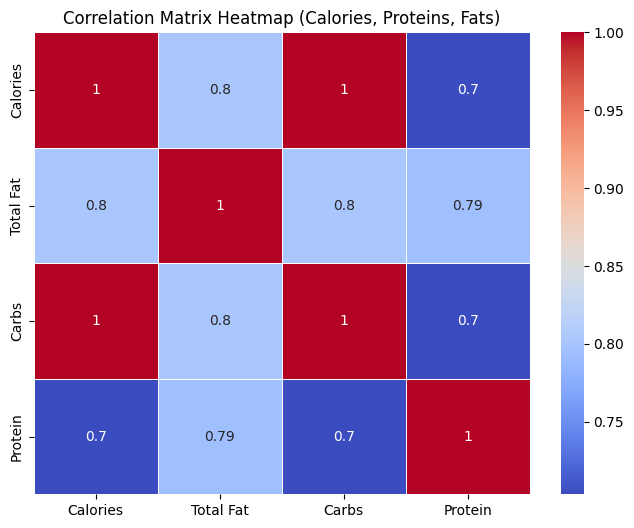

In [14]:

data = {
    'calories': df['Calories'],
    'proteins': df['Protein'],
    'fats':df['Total Fat']
}
data = pd.DataFrame(data)

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap (Calories, Proteins, Fats)')
plt.show()

C:\Users\Nived\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


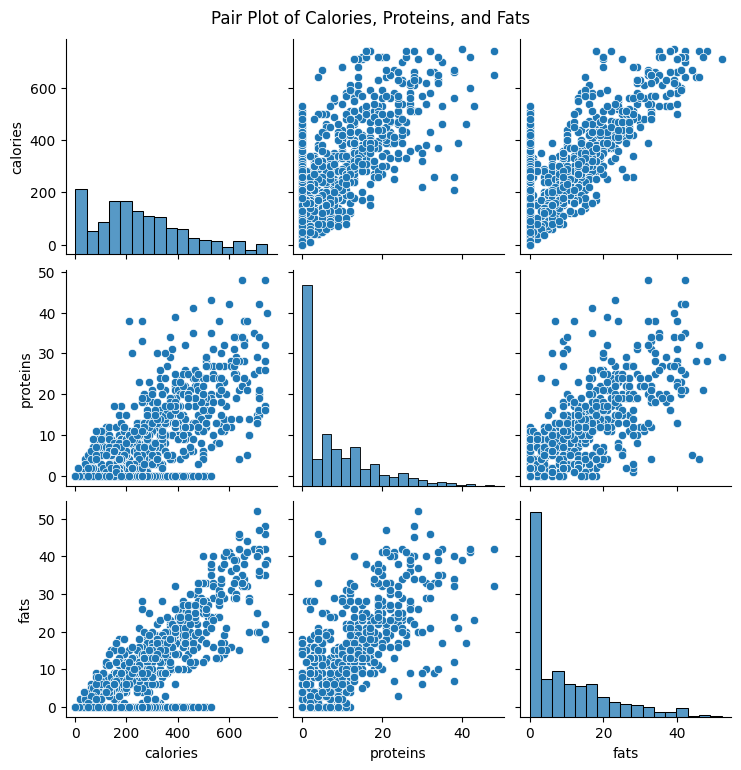

In [15]:
# Create a pair plot
sns.pairplot(data)
plt.suptitle('Pair Plot of Calories, Proteins, and Fats', y=1.02)  # Add a title above the plots
plt.show()

C:\Users\Nived\AppData\Local\Temp\ipykernel_10548\4248210777.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


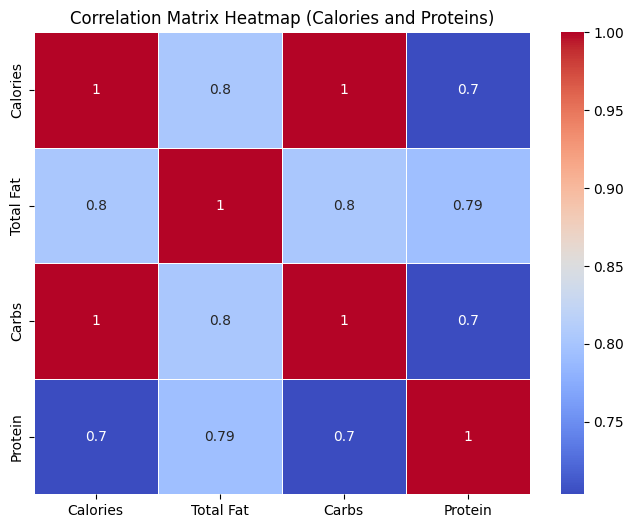

In [16]:
data = {
    'calories': df['Calories'],
    'proteins': df['Protein']
}
data = pd.DataFrame(data)

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap (Calories and Proteins)')
plt.show()

<Axes: xlabel='Item'>

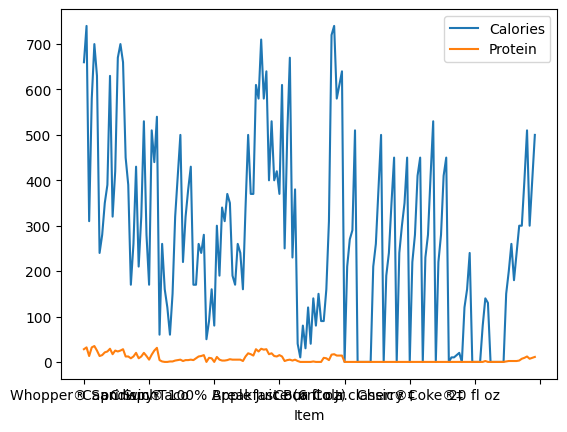

In [17]:
data = df.loc[df['Company']=="Burger King"]
data.plot(x='Item',y=['Calories','Protein'])

### 1. What is the average Calorie Count?

In [18]:
average_calories = df['Calories'].mean()
print(f"Average Calorie Content: {average_calories:.2f} calories")


Average Calorie Content: 258.56 calories


### 2. Which fast food chain has the highest average calorie content per food item?

In [19]:
chain_avg_calories = df.groupby('Company')['Calories'].mean()
chain_with_highest_avg_calories = chain_avg_calories.idxmax()
print(f"Fast Food Chain with Highest Average Calorie Content: {chain_with_highest_avg_calories}")


Fast Food Chain with Highest Average Calorie Content: Wendy’s


### 3. What is the most and least calorie-dense food item in the dataset?

In [20]:
most_calorie_dense_item = df.loc[df['Calories'].idxmax()]
least_calorie_dense_item = df.loc[df['Calories'].idxmin()]
print(f"Most Calorie-Dense Food Item: {most_calorie_dense_item['Item']} ({most_calorie_dense_item['Calories']} calories)")
print(f"Least Calorie-Dense Food Item: {least_calorie_dense_item['Item']} ({least_calorie_dense_item['Calories']} calories)")


Most Calorie-Dense Food Item: Angus Deluxe (750 calories)
Least Calorie-Dense Food Item: Salt Packet (0 calories)


### 4. How many unique food items are there in each fast food chain?

In [21]:
unique_items_per_chain = df.groupby('Company')['Item'].nunique()
print("Unique Food Items in Each Fast Food Chain:")
print(unique_items_per_chain)


Unique Food Items in Each Fast Food Chain:
Company
Burger King    130
KFC            207
McDonald’s     316
Pizza Hut       74
Taco Bell      178
Wendy’s        150
Name: Item, dtype: int64


### 5. What is the total fat content across all fast food chains?

In [22]:
total_fat_content = df['Total Fat'].sum()
print(f"Total Fat Content Across All Fast Food Chains: {total_fat_content:.2f} grams")


Total Fat Content Across All Fast Food Chains: 10543.00 grams


### 6. Which fast food chain has the highest total fat content?

In [24]:
chain_total_fat = df.groupby('Company')['Total Fat'].sum()
chain_with_highest_total_fat = chain_total_fat.idxmax()
print(f"Fast Food Chain with Highest Total Fat Content: {chain_with_highest_total_fat}")


Fast Food Chain with Highest Total Fat Content: McDonald’s


### 7. What is the average protein content across all food items?

In [25]:
average_protein = df['Protein'].mean()
print(f"Average Protein Content: {average_protein:.2f} grams")


Average Protein Content: 7.90 grams


### 8. Which food item has the highest protein content?

In [26]:
food_item_highest_protein = df.loc[df['Protein'].idxmax()]
print(f"Food Item with Highest Protein Content: {food_item_highest_protein['Item']} ({food_item_highest_protein['Protein']} grams)")


Food Item with Highest Protein Content: Double Quarter Pounder® with Cheese (48 grams)


### 9. What is the distribution of calorie content in the dataset? (Histogram)

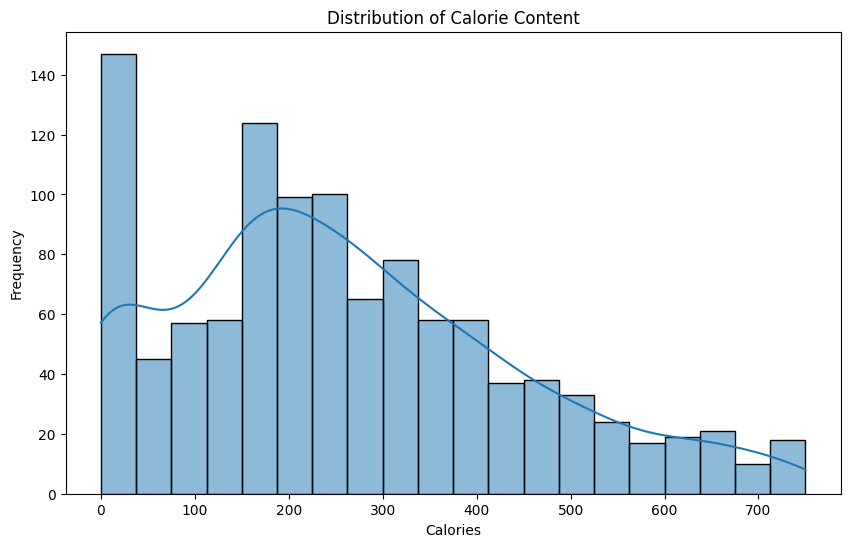

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], bins=20, kde=True)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calorie Content')
plt.show()


### 10. Is there a correlation between calorie content and fat content in the dataset?

In [28]:
correlation = df['Calories'].corr(df['Total Fat'])
print(f"Correlation between Calorie Content and Fat Content: {correlation:.2f}")


Correlation between Calorie Content and Fat Content: 0.80


### 11. What is the average fat content for each fast food chain?

In [29]:
chain_avg_fats = df.groupby('Company')['Total Fat'].mean()
print("Average Fat Content for Each Fast Food Chain:")
print(chain_avg_fats)


Average Fat Content for Each Fast Food Chain:
Company
Burger King    11.419540
KFC             6.764151
McDonald’s      8.898734
Pizza Hut      10.932432
Taco Bell      10.466667
Wendy’s        10.780000
Name: Total Fat, dtype: float64


### 12. Which fast food chain has the lowest average fat content?


In [30]:
chain_with_lowest_avg_fat = chain_avg_fats.idxmin()
print(f"Fast Food Chain with Lowest Average Fat Content: {chain_with_lowest_avg_fat}")


Fast Food Chain with Lowest Average Fat Content: KFC


### 13. How many food items have a calorie content greater than a certain threshold (e.g., 500 calories)?

In [31]:
threshold = 500
high_calorie_items = df[df['Calories'] > threshold]
print(f"Food Items with Calorie Content > {threshold} calories:")
print(high_calorie_items[['Company', 'Item', 'Calories']])


Food Items with Calorie Content > 500 calories:
         Company                                            Item  Calories
4     McDonald’s                    Quarter Pounder® with Cheese       510
5     McDonald’s             Double Quarter Pounder® with Cheese       740
6     McDonald’s                                        Big Mac®       540
8     McDonald’s                       Big N’ Tasty® with Cheese       510
10    McDonald’s                                    Angus Deluxe       750
...          ...                                             ...       ...
1012   Taco Bell      Grande Toasted Breakfast Burrito – Sausage       560
1013   Taco Bell        Grande Toasted Breakfast Burrito – Steak       560
1015   Taco Bell    Hash Brown Toasted Breakfast Burrito – Bacon       570
1016   Taco Bell  Hash Brown Toasted Breakfast Burrito – Sausage       570
1017   Taco Bell    Hash Brown Toasted Breakfast Burrito – Steak       570

[126 rows x 3 columns]


### 14. Which fast food chain offers the most and least protein-rich food items on average?

In [32]:
chain_avg_proteins = df.groupby('Company')['Protein'].mean()
chain_with_most_protein_rich_items = chain_avg_proteins.idxmax()
chain_with_least_protein_rich_items = chain_avg_proteins.idxmin()
print(f"Fast Food Chain with Most Protein-Rich Food Items on Average: {chain_with_most_protein_rich_items}")
print(f"Fast Food Chain with Least Protein-Rich Food Items on Average: {chain_with_least_protein_rich_items}")


Fast Food Chain with Most Protein-Rich Food Items on Average: Pizza Hut
Fast Food Chain with Least Protein-Rich Food Items on Average: KFC


### 15. Can you identify the top 5 food items with the lowest calorie and fat content combined?

In [33]:
top_low_calorie_low_fat_items = df.nsmallest(5, ['Calories', 'Total Fat'])
print("Top 5 Food Items with the Lowest Calorie and Fat Content Combined:")
print(top_low_calorie_low_fat_items[['Item', 'Calories', 'Total Fat']])


Top 5 Food Items with the Lowest Calorie and Fat Content Combined:
                   Item  Calories  Total Fat
38          Salt Packet         0          0
64      Salad Dressings         0          0
148       Dasani® Water         0          0
156  Diet Coke® (Child)         0          0
157  Diet Coke® (Small)         0          0


### 16. Is there a relationship between the number of food items offered by a fast food chain and its average calorie content?

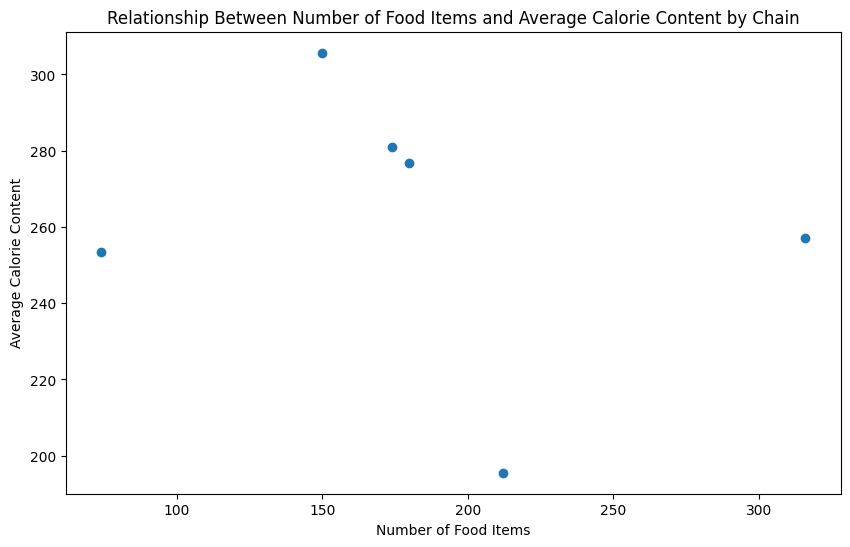

In [34]:
chain_item_count = df.groupby('Company')['Item'].count()
plt.figure(figsize=(10, 6))
plt.scatter(chain_item_count, chain_avg_calories)
plt.xlabel('Number of Food Items')
plt.ylabel('Average Calorie Content')
plt.title('Relationship Between Number of Food Items and Average Calorie Content by Chain')
plt.show()


### 17. What is the median calorie content for each fast food chain??

In [35]:
chain_median_calories = df.groupby('Company')['Calories'].median()
print("Median Calorie Content for Each Fast Food Chain:")
print(chain_median_calories)


Median Calorie Content for Each Fast Food Chain:
Company
Burger King    260.0
KFC            170.0
McDonald’s     230.0
Pizza Hut      250.0
Taco Bell      220.0
Wendy’s        305.0
Name: Calories, dtype: float64


### 18. How many food items from each fast food chain exceed the daily calorie intake??

In [36]:
recommended_daily_calories = 2000
high_calorie_items = df[df['Calories'] > recommended_daily_calories]
print(f"Food Items Exceeding {recommended_daily_calories} calories:")
print(high_calorie_items[['Company', 'Item', 'Calories']])



Food Items Exceeding 2000 calories:
Empty DataFrame
Columns: [Company, Item, Calories]
Index: []


### 19. Can you identify any outliers in the dataset in terms of calorie content, fat, or protein?

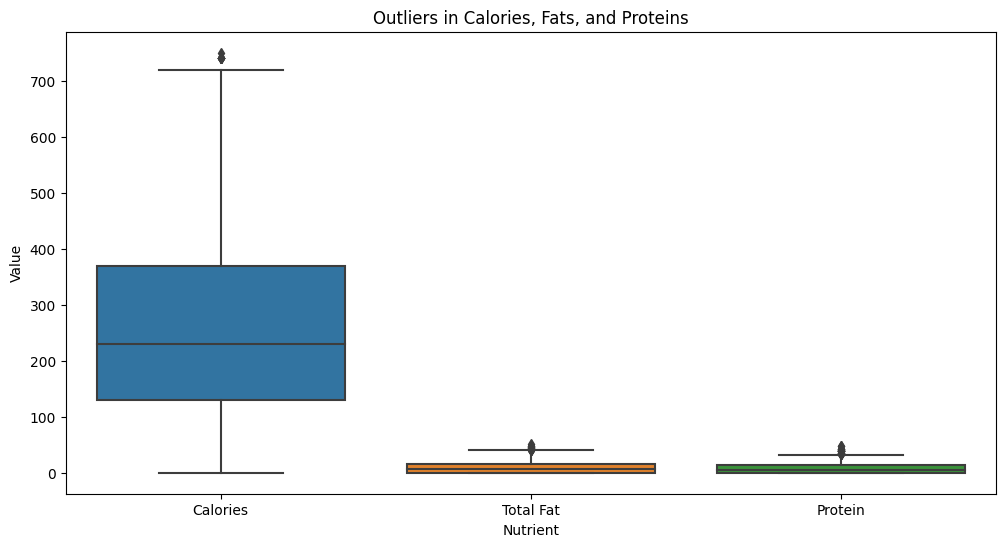

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Calories', 'Total Fat', 'Protein']])
plt.xlabel('Nutrient')
plt.ylabel('Value')
plt.title('Outliers in Calories, Fats, and Proteins')
plt.show()


### 20. What is the average calorie-to-protein ratio for each fast food chain?

In [38]:
df['calorie_to_protein_ratio'] = df['Calories'] / df['Protein']
chain_avg_ratio = df.groupby('Company')['calorie_to_protein_ratio'].mean()
print("Average Calorie-to-Protein Ratio for Each Fast Food Chain:")
print(chain_avg_ratio)

Average Calorie-to-Protein Ratio for Each Fast Food Chain:
Company
Burger King          NaN
KFC                  NaN
McDonald’s           NaN
Pizza Hut      22.686301
Taco Bell            NaN
Wendy’s              NaN
Name: calorie_to_protein_ratio, dtype: float64


# Distributions

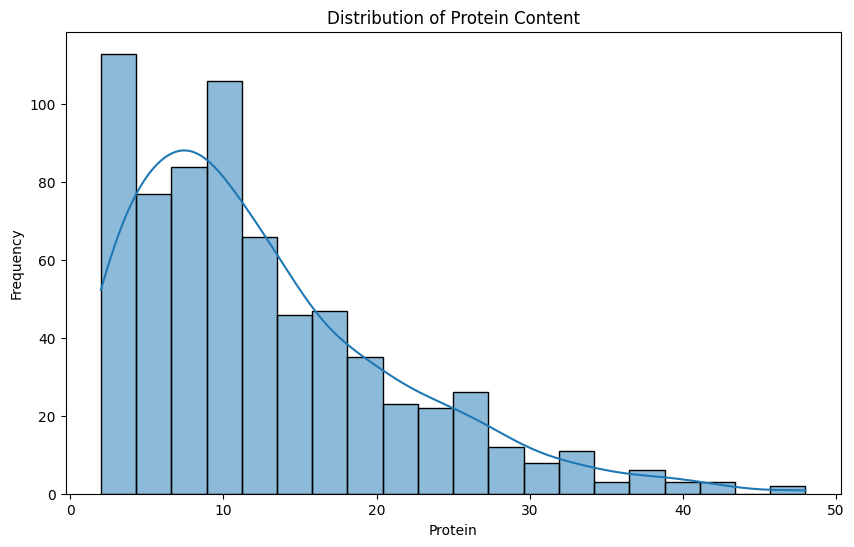

In [39]:
df = df = df[df['Protein'] > 1]
plt.figure(figsize=(10, 6))
sns.histplot(df['Protein'], bins=20, kde=True)
plt.xlabel('Protein')
plt.ylabel('Frequency')
plt.title('Distribution of Protein Content')
plt.show()

### Frequency of Total Fat

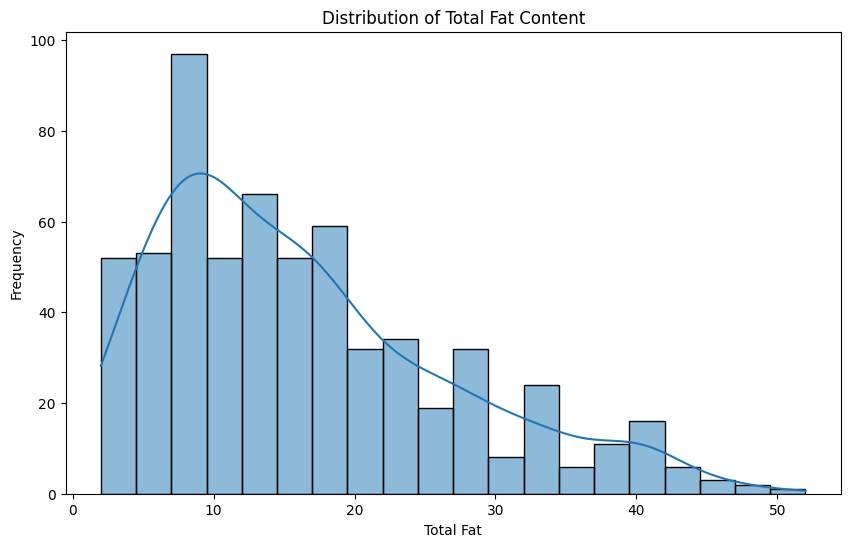

In [40]:
df = df = df[df['Total Fat'] > 1]
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Fat'], bins=20, kde=True)
plt.xlabel('Total Fat')
plt.ylabel('Frequency')
plt.title('Distribution of Total Fat Content')
plt.show()

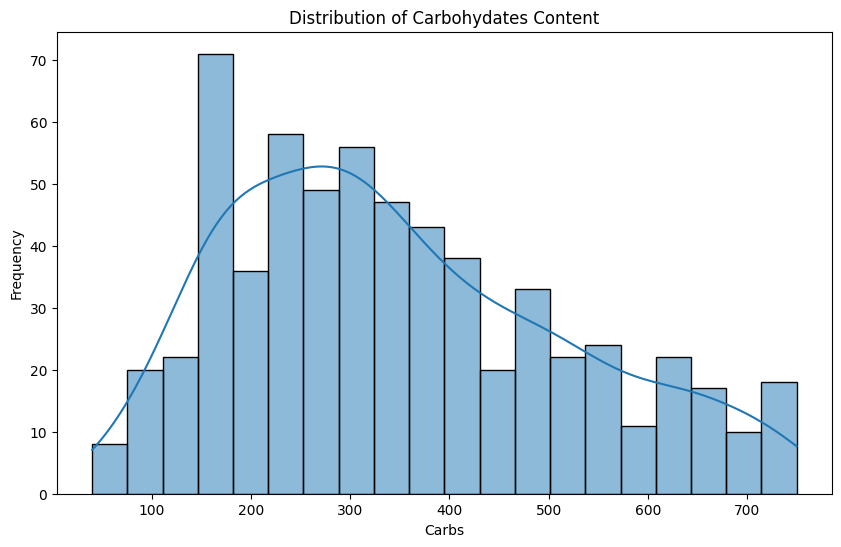

In [43]:
df = df = df[df['Carbs'] > 10]
plt.figure(figsize=(10, 6))
sns.histplot(df['Carbs'], bins=20, kde=True)
plt.xlabel('Carbs')
plt.ylabel('Frequency')
plt.title('Distribution of Carbohydates Content')
plt.show()